# My First Data Science Project

## Helicopter Escapes!

We begin by importing some helper functions.

In [24]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [11]:
url = ("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")
data = data_from_url(url)

Let's print the first three rows.

In [12]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Removing the Details

Removing the details will make it easier to look at our data.

In [16]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [17]:
print(data[:3])

[['September 25, 2020', 'Forest prison, Brussels', 'Belgium', 'No'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Exctracting the Year

In [18]:
for row in data:
    row[0] = fetch_year(row[0])

In [19]:
print(data[:3])

[[2020, 'Forest prison, Brussels', 'Belgium', 'No'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Attempts per Year

Identifying what are the earliest and latest dates we have in our dataset.

In [25]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print(min_year)
print(max_year)

1973
2020


We'll now make a list of every year in the range of min year to max year. The number of attempts to break out of prison for each year will then be determined. This will ensure that we record jail breaks because years without any were not included in the dataset.

In [23]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)
print(years)

[1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Now we make a list with each element having the format [year>, 0].

In [27]:
attempts_per_year = []
for y in years:
    attempts_per_year.append([y,0])

We can now determine how many attempts there were in each year and answer one of our starting questions.

In [28]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)   

[[1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 2]]


Let's visualize the previous output in a friendlier way.

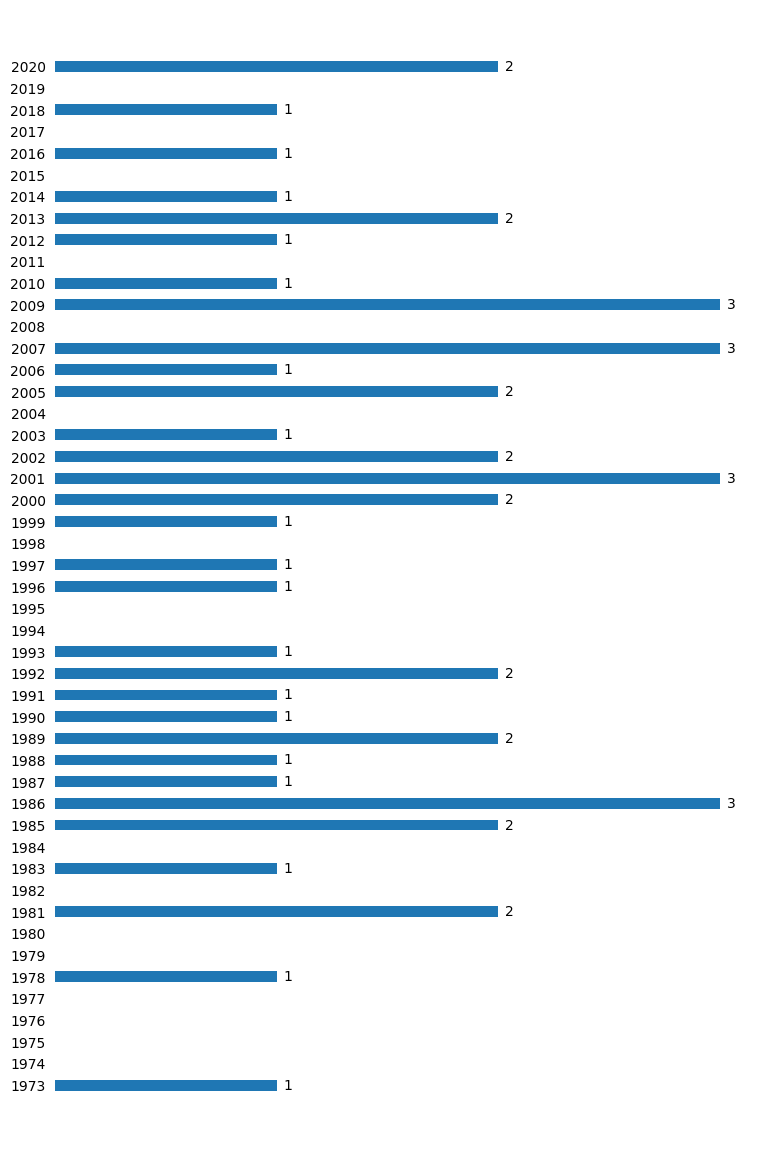

In [29]:
%matplotlib inline
barplot(attempts_per_year)

## Attempts by Country

In [30]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Greece,4
Belgium,4
Canada,4
United Kingdom,2
Brazil,2
Australia,2
Mexico,1
Puerto Rico,1


We can conclude, the country with the most helicopter prison escape attempts is France.